In [1]:
import os
import time
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer,roc_curve, auc, f1_score,recall_score, precision_score
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.utils.np_utils import to_categorical

%matplotlib inline

Using TensorFlow backend.


In [2]:
path =os.getcwd()

In [3]:
df =pd.read_csv(path +'/Kickstarter/cleaned_kick_data01.csv')

In [4]:
df.head()

,backers_count,category,country,created_at,currency,deadline,fx_rate,goal,location,pledged,staff_pick,status,duration,created_day,continent,city,state
0,0,film,GB,2017-01-11,GBP,2017-02-15,1.261110,40000.0,"London, UK",0.0,False,failed,35,11,Europe,London,UK
1,12,crafts,CA,2016-02-28,CAD,2016-03-29,0.748587,5000.0,"London, Canada",357.0,False,failed,30,28,America,London,Canada
2,1,games,AU,2016-02-13,AUD,2016-03-19,0.722499,5000.0,"Perth, AU",1.0,False,failed,35,13,Oceania,Perth,AU
3,3,fashion,US,2015-05-25,USD,2015-07-01,1.000000,1900.0,"Austin, TX",49.0,False,failed,37,25,America,Austin,TX
4,2,film,US,2018-05-18,USD,2018-06-17,1.000000,30000.0,"Los Angeles, CA",2.0,False,failed,30,18,America,Los Angeles,CA


In [5]:
#对标称属性进行独热编码，转变为数值属性
le =LabelEncoder()

In [6]:
df['backers_count'] =le.fit_transform(df['backers_count'].values)
df['category'] =le.fit_transform(df['category'].values)
df['country'] =le.fit_transform(df['country'].values)
df['currency'] =le.fit_transform(df['currency'].values)
df['staff_pick'] =le.fit_transform(df['staff_pick'].values)
df['status'] =le.fit_transform(df['status'].values)
df['duration'] =le.fit_transform(df['duration'].values)
df['created_day'] =le.fit_transform(df['created_day'].values)
df['continent'] =le.fit_transform(df['continent'].values)
df['city'] =le.fit_transform(df['city'].values)
df['state'] =le.fit_transform(df['state'].values)

In [7]:
#对类别信息进行处理
df['continent'] = to_categorical(df['continent']) 
df['category'] =to_categorical(df['category'])
df['country'] =to_categorical(df['country'])
df['city'] =to_categorical(df['city'])
df['state'] =to_categorical(df['state'])
df['currency'] =to_categorical(df['currency'])

In [8]:
df.head()

,backers_count,category,country,created_at,currency,deadline,fx_rate,goal,location,pledged,staff_pick,status,duration,created_day,continent,city,state
0,0,0.0,0.0,2017-01-11,0.0,2017-02-15,1.261110,40000.0,"London, UK",0.0,0,0,34,10,0.0,0.0,0.0
1,12,0.0,0.0,2016-02-28,0.0,2016-03-29,0.748587,5000.0,"London, Canada",357.0,0,0,29,27,1.0,0.0,0.0
2,1,0.0,0.0,2016-02-13,1.0,2016-03-19,0.722499,5000.0,"Perth, AU",1.0,0,0,34,12,0.0,0.0,0.0
3,3,0.0,0.0,2015-05-25,0.0,2015-07-01,1.000000,1900.0,"Austin, TX",49.0,0,0,36,24,1.0,0.0,0.0
4,2,0.0,0.0,2018-05-18,0.0,2018-06-17,1.000000,30000.0,"Los Angeles, CA",2.0,0,0,29,17,1.0,0.0,0.0


In [9]:
#对goal取对数
df['goal'] =np.log10(df.goal)
# df['city'] = np.log10(df.city)

In [10]:
df.head()

,backers_count,category,country,created_at,currency,deadline,fx_rate,goal,location,pledged,staff_pick,status,duration,created_day,continent,city,state
0,0,0.0,0.0,2017-01-11,0.0,2017-02-15,1.261110,4.602060,"London, UK",0.0,0,0,34,10,0.0,0.0,0.0
1,12,0.0,0.0,2016-02-28,0.0,2016-03-29,0.748587,3.698970,"London, Canada",357.0,0,0,29,27,1.0,0.0,0.0
2,1,0.0,0.0,2016-02-13,1.0,2016-03-19,0.722499,3.698970,"Perth, AU",1.0,0,0,34,12,0.0,0.0,0.0
3,3,0.0,0.0,2015-05-25,0.0,2015-07-01,1.000000,3.278754,"Austin, TX",49.0,0,0,36,24,1.0,0.0,0.0
4,2,0.0,0.0,2018-05-18,0.0,2018-06-17,1.000000,4.477121,"Los Angeles, CA",2.0,0,0,29,17,1.0,0.0,0.0


In [11]:
X= df.drop(['created_at', 'deadline',  'location', 'backers_count','staff_pick', 'status'],axis=1)
y =df['status']

In [12]:
X.head()

,category,country,currency,fx_rate,goal,pledged,duration,created_day,continent,city,state
0,0.0,0.0,0.0,1.261110,4.602060,0.0,34,10,0.0,0.0,0.0
1,0.0,0.0,0.0,0.748587,3.698970,357.0,29,27,1.0,0.0,0.0
2,0.0,0.0,1.0,0.722499,3.698970,1.0,34,12,0.0,0.0,0.0
3,0.0,0.0,0.0,1.000000,3.278754,49.0,36,24,1.0,0.0,0.0
4,0.0,0.0,0.0,1.000000,4.477121,2.0,29,17,1.0,0.0,0.0


    使用KNN来训练模型

In [13]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size =0.2, random_state =1 )

In [14]:
#10倍交叉验证的KNN
##
# start_time =time.time()
# k_range =range(1, 51)
# k_scores =[]
# for k in k_range:
#     print(k)
#     knn =KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, X, y, cv=10, scoring = 'accuracy')
#     k_scores.append(scores.mean())
# print(k_scores)
# end_time =time.time()
# dtime =end_time -start_time
# print('运行时间: %.8s s'%dtime)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
[0.814590900652471, 0.778349029530786, 0.8331635220738489, 0.8209969498239328, 0.8407543756023121, 0.8351110554384669, 0.8446497149100134, 0.8419043610426774, 0.8459403086303292, 0.8443446882857056, 0.847571137481881, 0.8465621072211004, 0.8486387650773652, 0.847758862056955, 0.8494952476100931, 0.8493896743906459, 0.8499292996036985, 0.8494600280875962, 0.850246070198223, 0.8503986096662143, 0.8506567251052839, 0.8504455483810058, 0.85139584914998, 0.8512902649172254, 0.8514427796063254, 0.8515249282070909, 0.851841679527278, 0.8517126541592726, 0.8520998252536692, 0.8517478406428168, 0.8519120910423956, 0.8514897430980699, 0.851607075431718, 0.8517126679248568, 0.8517361104388304, 0.8517830684260211, 0.8515132021305508, 0.8517830656730979, 0.8518769224541429, 0.851372460324143, 0.8515014884470096, 0.8518534303820635, 0.8516774786864513, 0.851654

In [15]:
##
# scores.mean()

0.8513841974126983

In [16]:
##
# max(k_scores)

0.8520998252536692

Text(0.5, 1.0, 'the accuracy of each K')

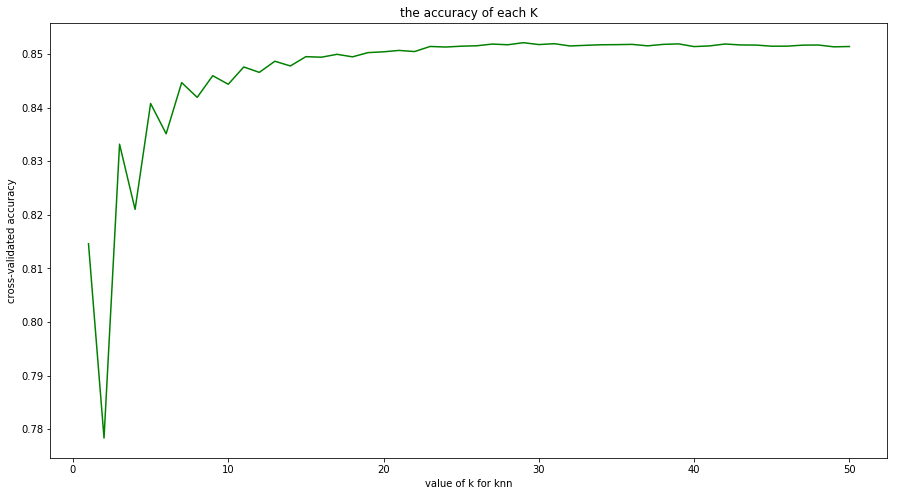

In [17]:
# plt.plot(k_range, k_scores, color ='g')
##
# fig =plt.figure(figsize=(15,8))
# ax =plt.axes()
# ax.plot(k_range, k_scores, color ='g')
# ax.set_xlabel('value of k for knn')
# ax.set_ylabel('cross-validated accuracy')
# ax.set_title('the accuracy of each K')

In [18]:
#找出最佳k值
##
# MSE = [1 - x for x in k_scores]
# optimal_k = k_range[MSE.index(min(MSE))]
# print ('The optimal number of neighbors is %d' % optimal_k)

The optimal number of neighbors is 29


In [35]:
knn =KNeighborsClassifier(n_neighbors=29)
scores = cross_val_score(knn, X, y, cv=10, scoring = 'accuracy').mean()
print("scores:%.3f "%scores)

scores:0.852 


In [36]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=29, p=2,
           weights='uniform')

In [37]:
knn_pre =knn.predict(X_test)

In [38]:
accuracy_score(y_test, knn_pre)

0.8545198568663108

In [39]:
knn.score(X_train, y_train)

0.8599712550963541

In [40]:
knn.score(X_test,y_test)

0.8545198568663108

In [41]:
print('the f1_score of  KNN:',f1_score(y_test, knn_pre, average="macro"))
print('the precision_score of KNN:', precision_score(y_test, knn_pre, average="macro"))
print('the recall_score of KNN:',recall_score(y_test, knn_pre, average="macro")) 

the f1_score of  KNN: 0.8542154246782638
the precision_score of KNN: 0.8584042966664888
the recall_score of KNN: 0.8549146178836926


In [42]:
fpr_knn, tpr_knn, thrsholds_knn =roc_curve(y_test, knn.predict_proba(X_test)[:,1])

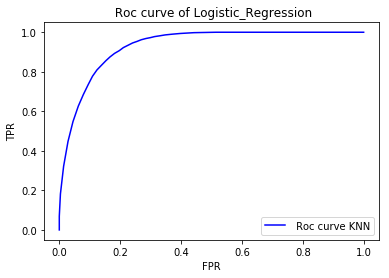

In [43]:
plt.plot(fpr_knn, tpr_knn, label =' Roc curve KNN', color='b')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(' Roc curve of Logistic_Regression')
# plt.plot(fpr[close_zero], tpr[close_zero], 'o', marksize =10, label ='thrshold zero rf', fillstyle = 'none', c ='k', mew =2)
plt.legend(loc =4)

In [44]:
print('auc of KNN', auc(fpr_knn, tpr_knn))

auc of KNN 0.9306489828771047
